In [2]:
import numpy as np
import torch
import torch.nn.functional as torchF
import torch.nn as torchNN
import matplotlib.pyplot as plt
%matplotlib inline

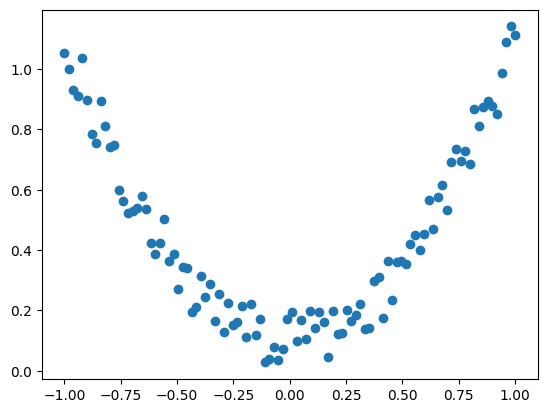

In [3]:
trainX = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
trainY = trainX.pow(2) + 0.2 * torch.rand(trainX.size())                # random noisy

plt.scatter(trainX.data.numpy(), trainY.data.numpy())

In [ ]:
class Network(torchNN.Module):
    def __init__(self, featureShape, hiddenNum, outputShape) -> None:
        super(Network, self).__init__()

        self.hidden = torchNN.Linear(featureShape, hiddenNum)
        self.outputLayer = torchNN.Linear(outputShape)

    def call(self, inputData):
        x = torchF.relu(self.hidden(inputData))
        x = self.outputLayer(x)
    
    def Backfard(self): ...
